A notebook for describing and demonstrating the evaluation of an exhaustive list of spectral parameter types on the given instrument-resampled spectal library.

# Overview

A spectral parameter reduces the spectral reflectance of a material to a scalar value, by an expression that typically uses 1--3 channels and wavelengths, and combines these to give some measure of a `feature` of the spectrum, such as the depth of a absorption band, centred on one wavelenght and situated between a shorter wavelength and a longer wavelength.

Here we demonstrate how the ```sptk.spectral_parameters``` class can be used to evaluate a large number of spectral parameters.

We have used four general spectral parameter expressions from the literature, and have a routine for iteratively considering all valid channel combinations into the variables of these expressions, to exhaustively evaluate these spectral parameters.

Our set of spectral parameters consists of 4 types: Ratio, Slope, Band-Depth and
Shoulder-Height. These are the 4 main spectral parameter types defined for 
analysing CRISM spectral imaging data (Pelkey et al., 2007; Viviano-Beck et al.,
2014), with the exception of doublet/two-band spectral parameters that measure 
features that typical multispectral VNIR systems are not capable of resolving.

The steps involved are:

1. Load the previously defined MatericalCollection and Instrument objects
2. Load the previously defined Observation object
3. Create a SpectralParameters object from the observation
4. Compute the Spectral Parameters

# Loading the Previously Defined Material Collection, Instrument and Observation

In [2]:
from sptk.material_collection import MaterialCollection
from sptk.instrument import Instrument
from sptk.observation import Observation

project_name = 'sptk_example'
MATERIAL_SET = {
    'Reds': [('synthetic_reds', '*'),
            ('mineral_reds', '*')],
    'Greens': [('synthetic_greens', '*')]}
spectral_library = 'example_spectral_library'
matcol = MaterialCollection(MATERIAL_SET,
            spectral_library,
            project_name,
            load_existing=True,
            plot_profiles=False)
inst = Instrument(
            name = 'example_instrument',
            project_name = 'sptk_example',
            load_existing=True)
obs = Observation(
        material_collection=matcol,
        instrument=inst,
        load_existing=True,
        plot_profiles=False)

Loading existing sptk_example MaterialCollection DF
Exporting the Material Collection to CSV and Pickle formats...
Building Instrument...
Loading existing DataFrame for 'example_instrument'...
Loading existing Observation DataFrame...
Exporting the Observation Pickle format...
Observation export complete.


# Creating the Spectral Parameters Object

In [3]:
from sptk.spectral_parameters import SpectralParameters

In [4]:
sps = SpectralParameters(
        observation=obs,
        load_existing=True)

No existing DataFrame,building new Spectral Parameters forsptk_example
SpectralParameters export complete.


# Computing the Spectral Parameters

In [5]:
sps.compute_spectral_parameters(export_df=True)

SpectralParameters export complete.


We can produce a list of the spectral parameters that have been computed:

In [6]:
sps.sp_list

['R440',
 'R500',
 'R580',
 'R650',
 'R780',
 'R850',
 'R950',
 'R1000',
 'R_440_500',
 'R_440_580',
 'R_440_650',
 'R_440_780',
 'R_440_850',
 'R_440_950',
 'R_440_1000',
 'R_500_440',
 'R_500_580',
 'R_500_650',
 'R_500_780',
 'R_500_850',
 'R_500_950',
 'R_500_1000',
 'R_580_440',
 'R_580_500',
 'R_580_650',
 'R_580_780',
 'R_580_850',
 'R_580_950',
 'R_580_1000',
 'R_650_440',
 'R_650_500',
 'R_650_580',
 'R_650_780',
 'R_650_850',
 'R_650_950',
 'R_650_1000',
 'R_780_440',
 'R_780_500',
 'R_780_580',
 'R_780_650',
 'R_780_850',
 'R_780_950',
 'R_780_1000',
 'R_850_440',
 'R_850_500',
 'R_850_580',
 'R_850_650',
 'R_850_780',
 'R_850_950',
 'R_850_1000',
 'R_950_440',
 'R_950_500',
 'R_950_580',
 'R_950_650',
 'R_950_780',
 'R_950_850',
 'R_950_1000',
 'R_1000_440',
 'R_1000_500',
 'R_1000_580',
 'R_1000_650',
 'R_1000_780',
 'R_1000_850',
 'R_1000_950',
 'S_440_500',
 'S_440_580',
 'S_440_650',
 'S_440_780',
 'S_440_850',
 'S_440_950',
 'S_440_1000',
 'S_500_580',
 'S_500_650',
 '

It is a very long list, and we can check the length to see:

In [7]:
len(sps.sp_list)

204

So for this example, we have evaluated 204 different spectral parameters.

We can also investigate which filters are used by the spectral parameters:

In [8]:
sps.sp_filters

R440                         F01
R500                         F02
R580                         F03
R650                         F04
R780                         F05
                       ...      
SH_650_950_1000    F04, F07, F08
SH_780_850_950     F05, F06, F07
SH_780_850_1000    F05, F06, F08
SH_780_950_1000    F05, F07, F08
SH_850_950_1000    F06, F07, F08
Length: 204, dtype: object

The results are stored in the SpectralParameters object dataframe:

In [9]:
sps.main_df

,Category,Sample ID,Mineral Name,Sample Description,Date Added,Viewing Geometry,Other Information,Formula,Composition,Resolution,...,SH_650_780_850,SH_650_780_950,SH_650_780_1000,SH_650_850_950,SH_650_850_1000,SH_650_950_1000,SH_780_850_950,SH_780_850_1000,SH_780_950_1000,SH_850_950_1000
Data ID,,,,,,,,,,,,,,,,,,,,,
ILS103_1_9547,Reds,ILS103_1,mineral_reds,Illite-smectite mixed layer (70:30 ordered),2024-01-11 11:17:11.585493,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.005272,0.008444,0.007726,0.004851,0.003753,-0.001633,-0.000087,-0.001484,-0.003364,-0.002873
MON102_f5_15975,Reds,MON102_f5,mineral_reds,NaN,2024-01-11 11:18:30.122723,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.006288,0.011022,0.010911,0.007244,0.007074,-0.000253,0.000795,-0.000325,-0.002706,-0.002598
OPA002r_f2_13393,Reds,OPA002r_f2,mineral_reds,See Other Silictes in HOSERLab datbase,2024-01-11 11:19:51.104013,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.018511,0.022845,0.020261,0.006740,0.002721,-0.006022,-0.006846,-0.011245,-0.010673,-0.006928
OPA002r_f4_13803,Reds,OPA002r_f4,mineral_reds,See Other Silictes in HOSERLab datbase,2024-01-11 11:19:51.213960,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.018625,0.022926,0.020290,0.006690,0.002590,-0.006145,-0.006945,-0.011398,-0.010803,-0.007007
PIG310_4965,Reds,PIG310,synthetic_reds,PIG310,2024-01-11 11:20:26.055337,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.152901,0.111915,0.060581,-0.071113,-0.160183,-0.114149,-0.145360,-0.206767,-0.127416,-0.068530
PIG342_4999,Reds,PIG342,synthetic_reds,PIG342,2024-01-11 11:20:28.424006,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.120256,0.107175,0.088000,-0.021374,-0.052706,-0.041746,-0.088334,-0.116433,-0.060615,-0.026140
PIG342_f1_7880,Reds,PIG342_f1,synthetic_reds,Pigment mixed with linseed oil,2024-01-11 11:20:28.460735,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.165968,0.121306,0.079175,-0.080694,-0.156816,-0.099259,-0.164495,-0.220213,-0.117630,-0.053819
PIG377_5027,Reds,PIG377,synthetic_reds,PIG377,2024-01-11 11:20:30.919722,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.118305,0.110988,0.092740,-0.011666,-0.040759,-0.038254,-0.079324,-0.106287,-0.057401,-0.026344
PIG379_f1_7910,Reds,PIG379_f1,synthetic_reds,Pigment mixed with linseed oil,2024-01-11 11:20:31.068081,I30_ e0,NaN,NaN,NaN,2@350-7@2500nm,...,0.162722,0.134741,0.099478,-0.050116,-0.113274,-0.085252,-0.142388,-0.192235,-0.108937,-0.051274


The dataframe of spectral parameters values has been exported to the `/sptk_example/spectral_parameters` directory, for access by the spectral parameter combiantion classifier method.

# Plotting the Spectral Parameters

Although not included in the paper and the accompanying notebook, we also have written functions for plotting the histogram distributions of each spectral parameter and for each class. This produces a large number of plots, so it is not always advised to use this, unless a specific question is being addressed.

To handle the large number of plots, we have gridded and grouped the plots, according to spectral parameter type: single channel, ratio, slope, band depth and shoulder height.

Within the band-depth and shoulder-height types, we have sub-grouped the plots according to the central wavelength of the parameter, and gridded the plots such that the shortwave wing wavelength varies in the vertical, and the longwave wing wavelength in the horiztonal, hence the change in propertions fo the figures for the different grids.

Plotting Spectral Parameters...


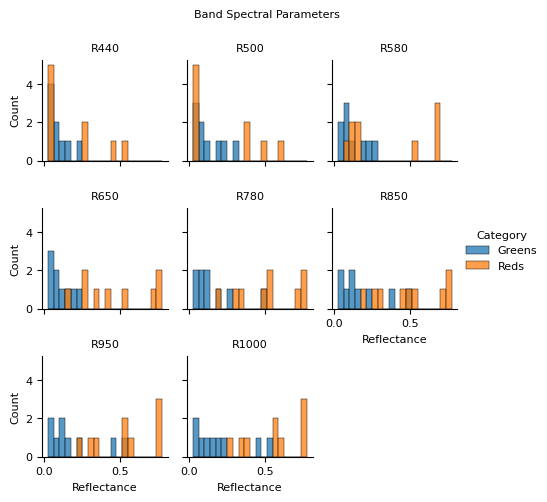

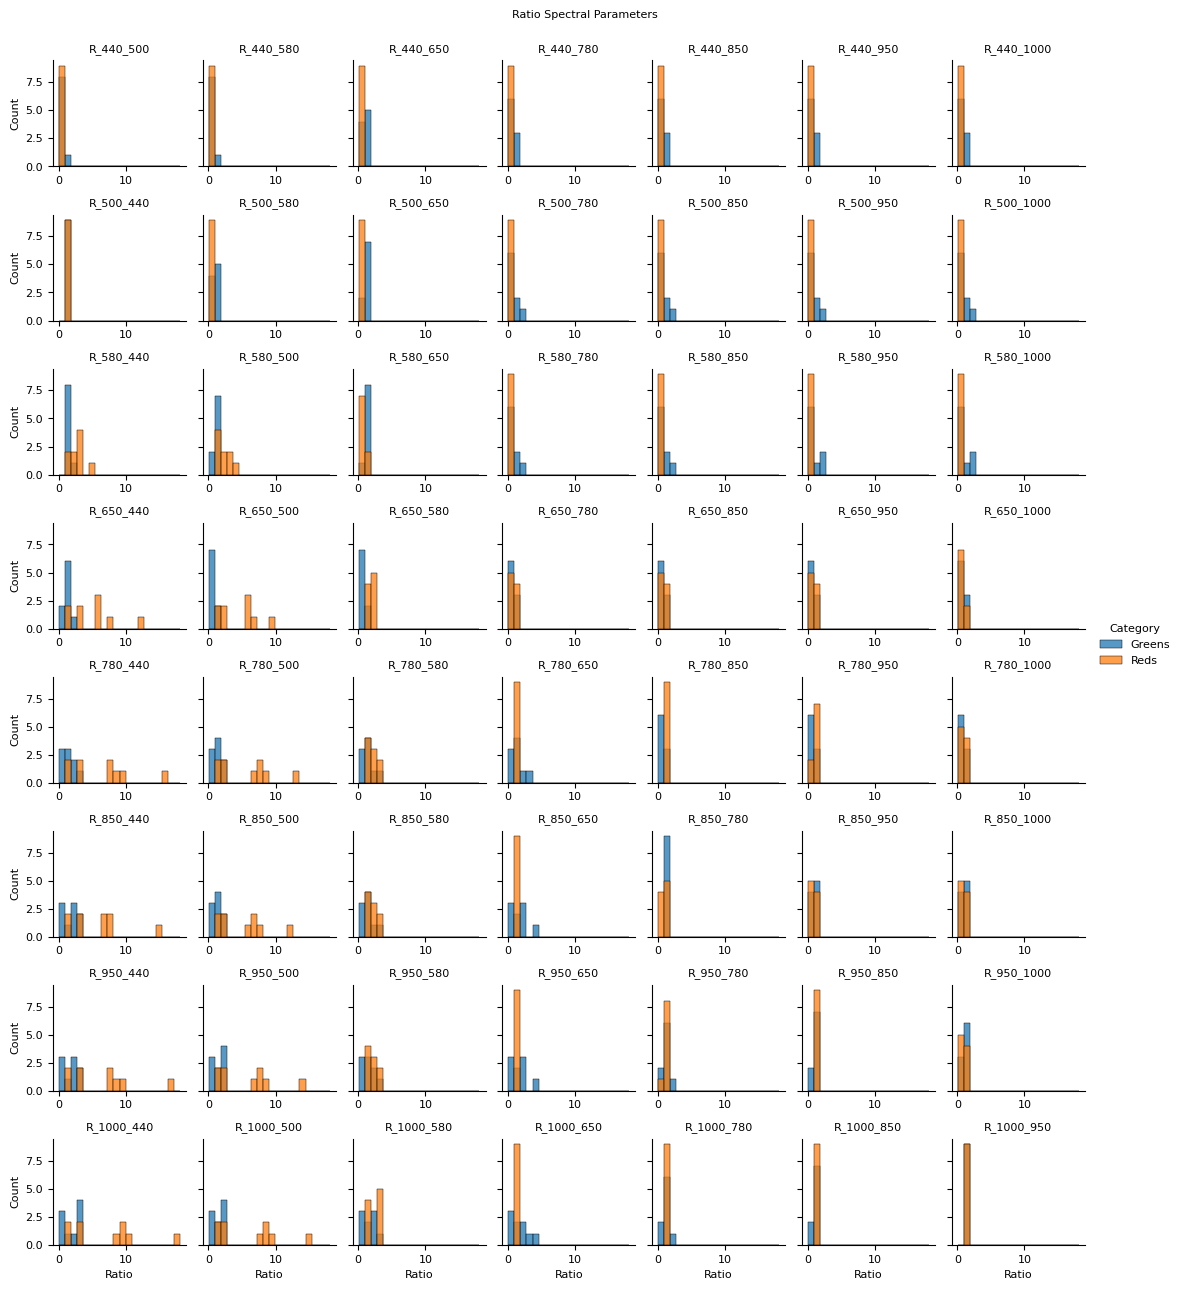

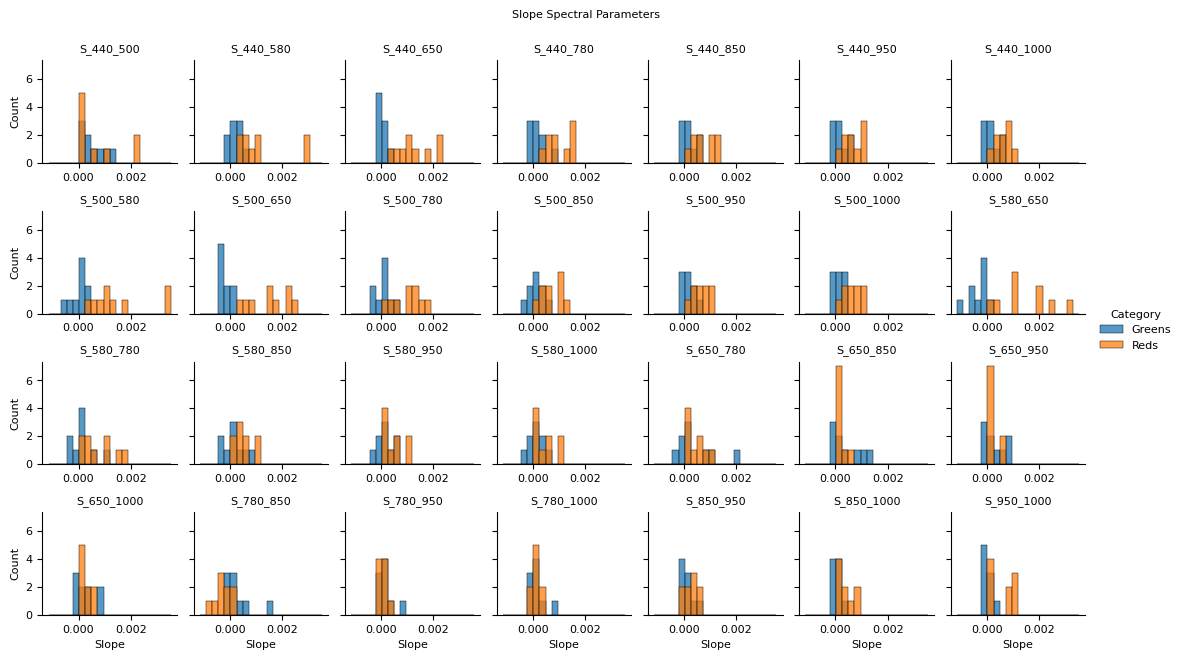

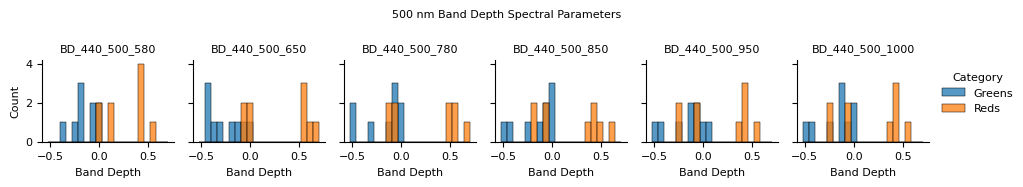

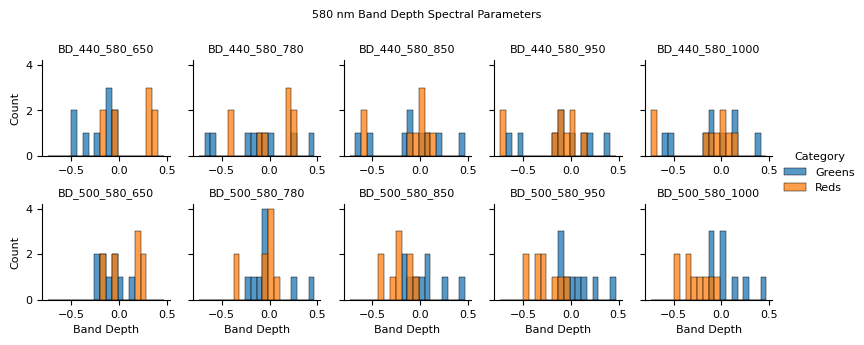

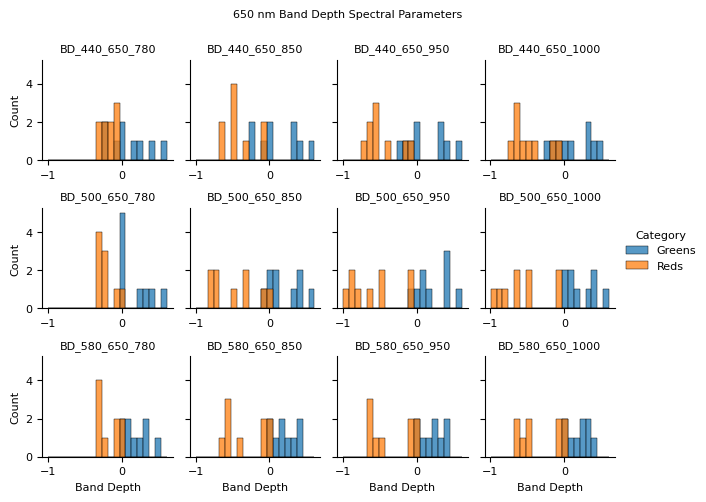

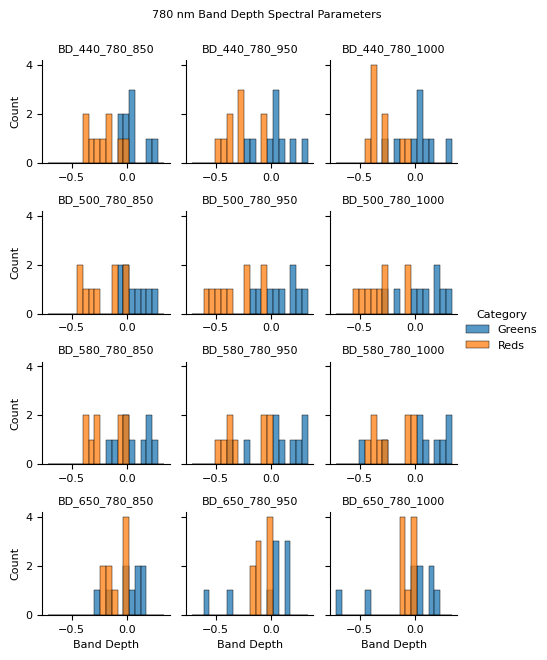

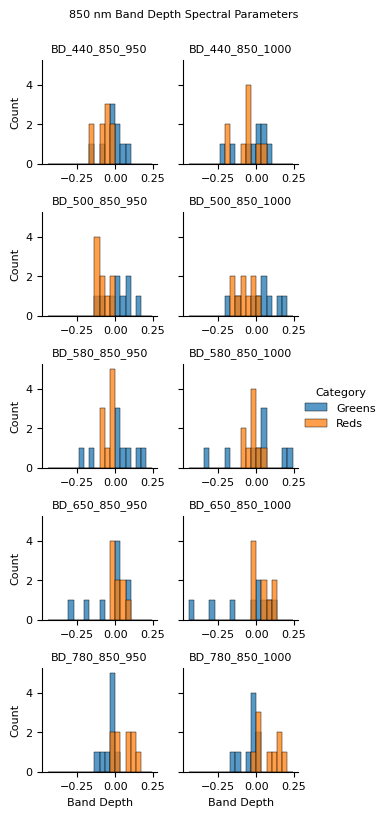

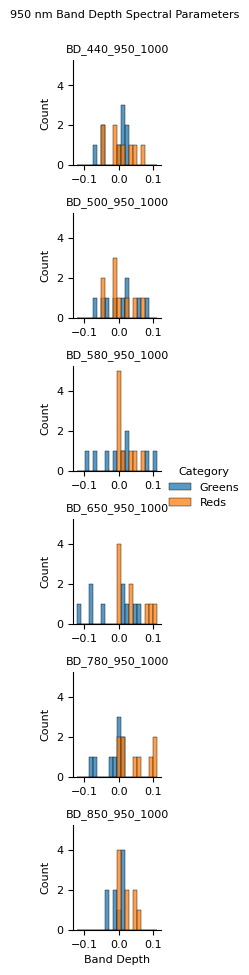

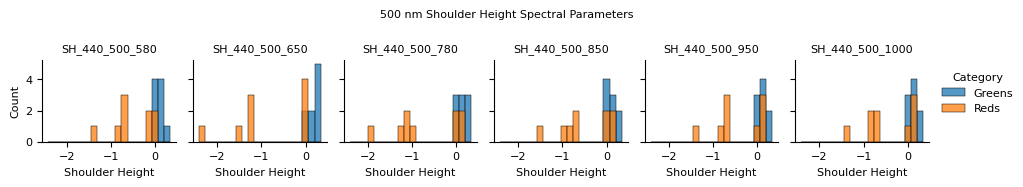

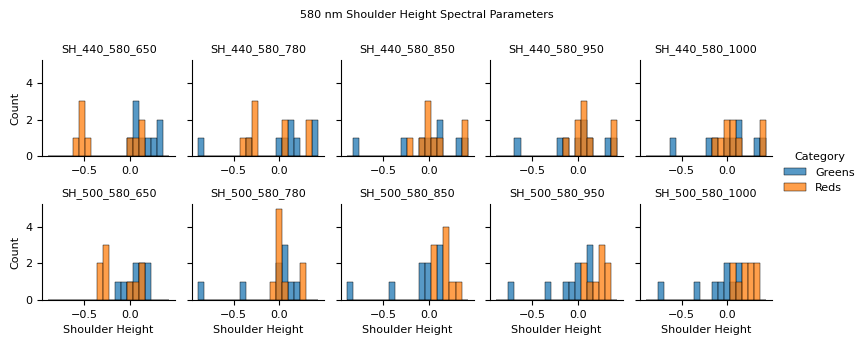

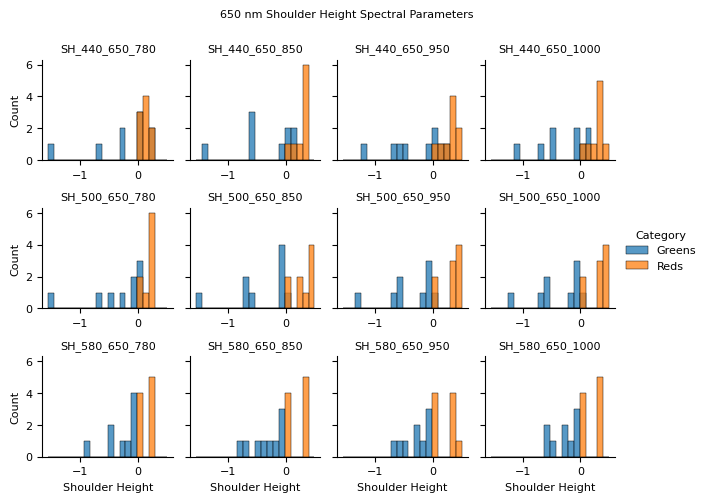

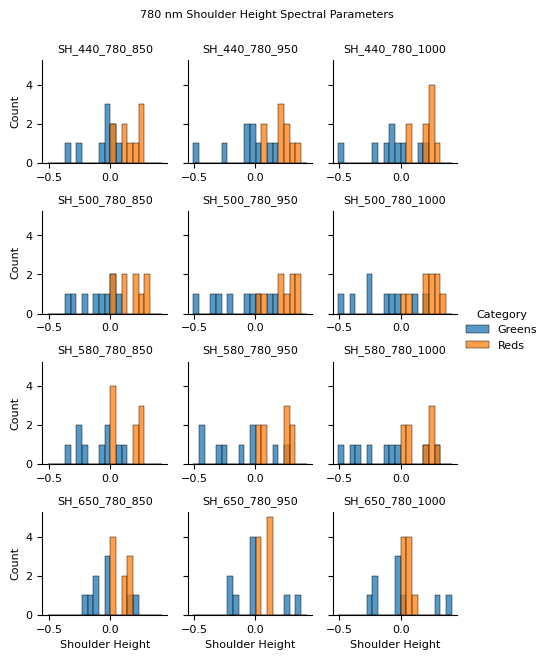

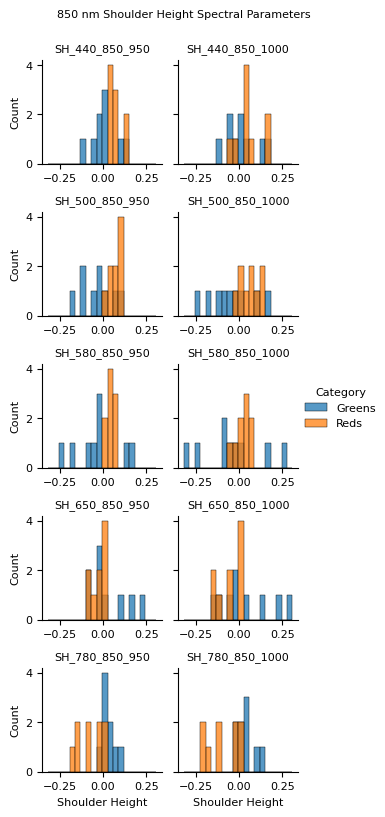

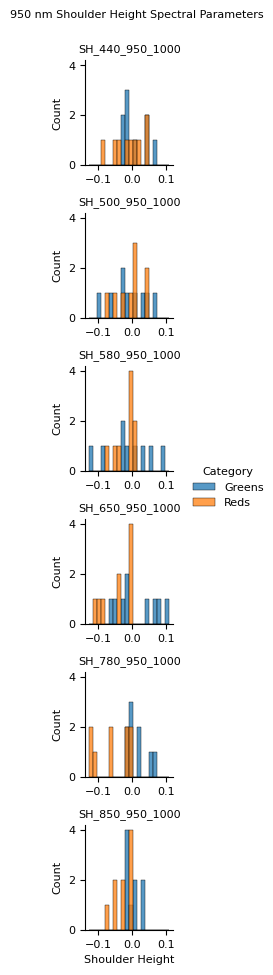

In [10]:
sps.gridplot_sp_histograms()